# Movie example using write_beam

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
# Nicer plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

Here we insert write_beam elements into an existing lattice, run, save the beams to an h5 file, and plot using openPMD-beamphysics tools

In [3]:
from impact import Impact
from distgen import Generator
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
IMPACT_IN  = 'templates/apex_gun/ImpactT.in'
DISTGEN_IN = 'templates/apex_gun/distgen.yaml'
os.path.exists(IMPACT_IN)

True

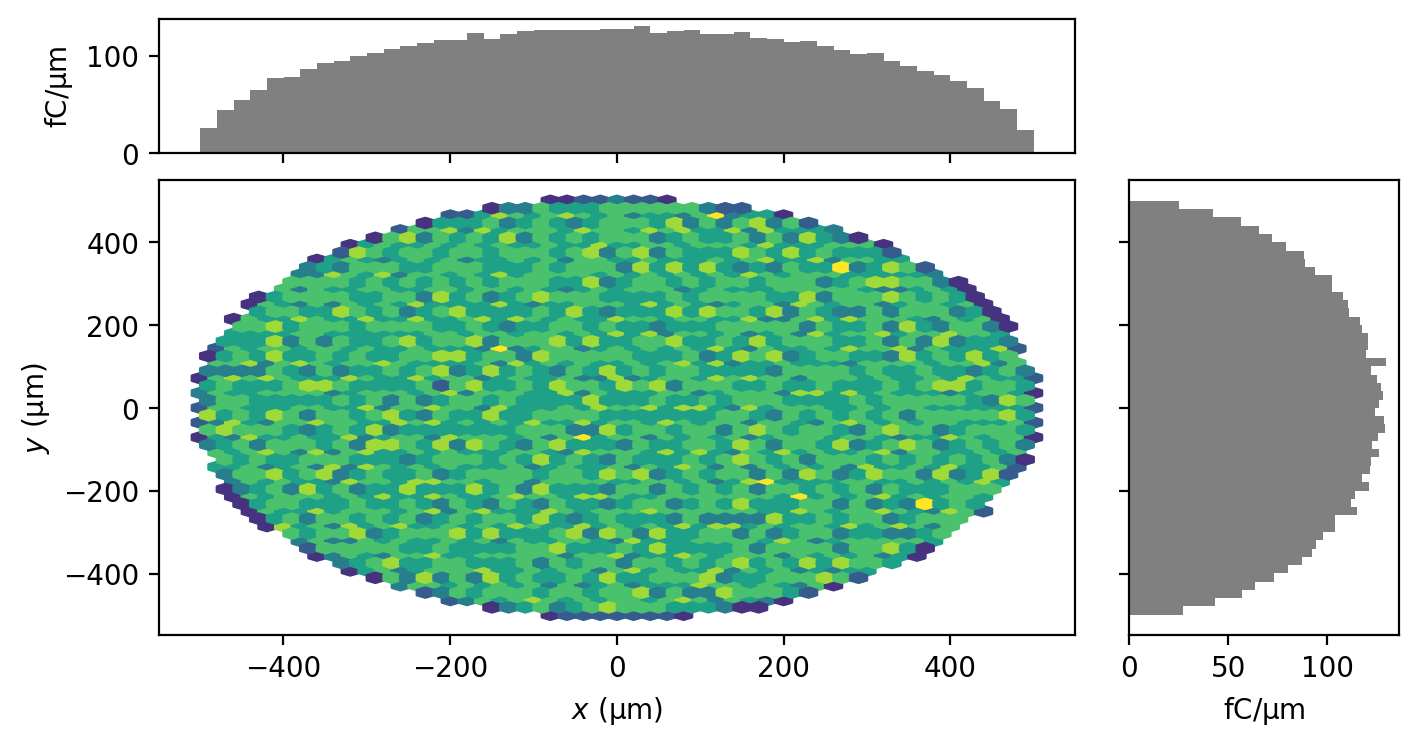

In [5]:
G = Generator(DISTGEN_IN)
G['n_particle'] = 10000
G.run()
P0 = G.particles
P0.plot('x', 'y')

In [6]:
# Make Impact object
I = Impact(IMPACT_IN, initial_particles = P0, verbose=True)


# Change some things
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 1e-13

I.total_charge = P0['charge']
# Change stop location
I.stop = 0.1


Configured to run in: /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpemtxmpqk
Removed element: stop_1
Set stop to s = 0.1


In [7]:
# Make new write_beam elements and add them to the lattice.
from impact.lattice import new_write_beam

# Make a list of s
for s in np.linspace(0.001, 0.1, 98):
    ele = new_write_beam(s=s, ref_eles=I.lattice) # ref_eles will ensure that there are no naming conflicts
    I.add_ele(ele)

Inserted ele 'write_beam_71' before ele 'APEX_GUN' at index 2 out of 8
Inserted ele 'write_beam_72' before ele 'APEX_GUN' at index 3 out of 9
Inserted ele 'write_beam_73' before ele 'APEX_GUN' at index 4 out of 10
Inserted ele 'write_beam_74' before ele 'APEX_GUN' at index 5 out of 11
Inserted ele 'write_beam_75' before ele 'APEX_GUN' at index 6 out of 12
Inserted ele 'write_beam_76' before ele 'APEX_GUN' at index 7 out of 13
Inserted ele 'write_beam_77' before ele 'APEX_GUN' at index 8 out of 14
Inserted ele 'write_beam_78' before ele 'APEX_GUN' at index 9 out of 15
Inserted ele 'write_beam_79' before ele 'APEX_GUN' at index 10 out of 16
Inserted ele 'write_beam_80' before ele 'APEX_GUN' at index 11 out of 17
Inserted ele 'write_beam_81' before ele 'APEX_GUN' at index 12 out of 18
Inserted ele 'write_beam_82' before ele 'APEX_GUN' at index 13 out of 19
Inserted ele 'write_beam_83' before ele 'APEX_GUN' at index 14 out of 20
Inserted ele 'write_beam_84' before ele 'APEX_GUN' at index 1

In [8]:
I.timeout = 1000
I.run()

Running Impact-T in /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpemtxmpqk
/Users/chrisonian/Code/Impact/IMPACT-T/build/ImpactTexe
writing 10000 particles to /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpemtxmpqk/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 5.064308571009823e-11 according to initial particles
Cathode start: Replaced Tini with -2.5403549006681165e-11 according to initial particles
Setting total charge to 1.0000000000000004e-10 C
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 25 : RMS Y information
Loaded fort 24 : RMS X information
Loaded fort 26 : RMS Z information
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 29 : Cube root of third moments of the beam distribution
Loaded fort 18 : Time and energy
Lo

In [9]:
len(I.particles)

100

# Plot

In [10]:
from bokeh.plotting import  show, figure, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource
from bokeh import palettes, colors
pal = palettes.Viridis[256]
white=colors.named.white
pal = list(pal)
pal[0] = white # replace 0 with white
pal = tuple(pal)
output_notebook(verbose=False, hide_banner=True)
import os

In [11]:
# Prepare histogram function

PL = I.particles

ilist = []
for k in PL:
    if k.startswith('write_beam_'):
        ilist.append(int(k.strip('write_beam_')))

def bin_particles(i, key1='x', key2='y', bins=40):
    
    P = I.particles[f'write_beam_{i}']
    
    return np.histogram2d(P[key1], P[key2], weights=P.weight, bins=bins)
bin_particles(100)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.56268257e-03, -1.48386568e-03, -1.40504878e-03, -1.32623188e-03,
        -1.24741498e-03, -1.16859808e-03, -1.08978118e-03, -1.01096428e-03,
        -9.32147381e-04, -8.53330482e-04, -7.74513583e-04, -6.95696684e-04,
        -6.16879785e-04, -5.38062886e-04, -4.59245986e-04, -3.80429087e-04,
        -3.01612188e-04, -2.22795289e-04, -1.43978390e-04, -6.51614906e-05,
         1.36554085e-05,  9.24723077e-05,  1.71289207e-04,  2.50106106e-04,
         3.28923005e-04,  4.07739904e-04,  4.86556804e-04,  5.65373703e-04,
         6.44190602e-04,  7.23007501e-04,  8.01824400e-04,  8.80641299e-04,
         9.59458199e-04,  1.03827510e-03,  1.11709200e-03,  1.19590890e-03,
         1.27472580e-03,  1.35354269e-03,  1.43235959e-03,  1.51117

In [12]:
# Prepare a datasource for Bokeh

def bin_bunch_datasource_h5(i, key1, key2,  bins=20, nice=True, liveOnly=True, liveStatus=1):
    H, xedges, yedges = bin_particles(i, key1, key2, bins=bins)
    xmin = min(xedges)
    xmax = max(xedges)
    ymin = min(yedges)
    ymax = max(yedges)
    
    
    #if nice:
    #    f1 = nice_phase_space_factor[component1]
    #    f2 = nice_phase_space_factor[component2]
    #    xlabel =  nice_phase_space_label[component1]
    #    ylabel =  nice_phase_space_label[component2]
    #    xmin *= f1
    #    xmax *= f1
    #    ymin *= f2
    #    ymax *= f2
    #else:
    #    xlabel = component1
    #    ylabel = component2
    
    # Form datasource
    dat = {'image':[H.transpose()], 'xmin':[xmin], 'ymin':[ymin], 'dw':[xmax-xmin], 'dh':[ymax-ymin]}
    dat['xmax'] = [xmax]
    dat['ymax'] = [ymax]
    
    ds = ColumnDataSource(data=dat)
    
    return ds
ds = bin_bunch_datasource_h5(100, 'x', 'y')

In [13]:

plot = figure(#x_range=[xmin,xmax], y_range=[ymin,ymax], 
              #    x_axis_label = xlabel,  y_axis_label = ylabel,
               plot_width=500, plot_height=500)
plot.image(image='image', x='xmin', y='ymin', dw='dw', dh='dh', source=ds,palette=pal)
show(plot)

# Interactive 

In [14]:
from bokeh.models.widgets import Slider
from bokeh import palettes, colors


In [19]:
# interactive
def myapp2(doc):
    
    bunches = ilist
    
    doc.bunchi = bunches[0]
    doc.component1 = 'z'
    doc.component2 = 'x' 
    doc.xlabel = doc.component1
    doc.ylabel = doc.component2

    doc.bins = 100
    
    #doc.range = FULLRANGE
    ds  = bin_bunch_datasource_h5(doc.bunchi, doc.component1, doc.component2,bins=doc.bins) 

    def refresh():
        ds.data  = dict(bin_bunch_datasource_h5(doc.bunchi, doc.component1, doc.component2,bins=doc.bins).data )
    
    # Default plot
  
    plot = figure(title='',  
                  x_axis_label = doc.xlabel, y_axis_label = doc.ylabel,
           plot_width=500, plot_height=500)    
    plot.image(image='image', x='xmin', y='ymin', dw='dw', dh='dh', source=ds, palette=pal)
    
    def slider_handler(attr, old, new):
        doc.bunchi =  bunches[new]
        refresh()

    slider = Slider(start=0, end=len(bunches)-1, value=0, step=1, title='x')             
    slider.on_change('value', slider_handler)

    # Add plot to end
    doc.add_root(column(slider, plot))
show(myapp2)# , notebook_url=remote_jupyter_proxy_url)

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}


In [16]:
# If there are multiple 
import os
os.environ['BOKEH_ALLOW_WS_ORIGIN'] = 'localhost:8888'

In [17]:
%%time
I.archive()

Archiving to file impact_c8d6f6b1f9386956f4a9c793d33eeb05.h5
CPU times: user 300 ms, sys: 42.7 ms, total: 343 ms
Wall time: 343 ms


'impact_c8d6f6b1f9386956f4a9c793d33eeb05.h5'